### Base Learner 7e  - Load Fit10-2 Model, fine_tune(20)

In [1]:
from fastai2.vision.all import *
import sys, torch
sys.path.append('..')

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


# %load_ext autoreload
# %autoreload 2
from modules.learnutils import TestSetRecorder
from modules.expbuilder import default_params, run_exp, rm_test_recorder

train_path = Path('../../../rf-chess-data/cropped_v1/')
train_clean_path = Path('../../../rf-chess-data/cropped_v1.1/')

test_path_all = Path('../../../other-chess-data/regulation-test-2-all/')
test_path_easy = Path('../../../other-chess-data/regulation-test-2-easy/')

In [2]:
learn = load_learner('../models/base-learner7-fit10-2.pkl')
learn.path = Path('../../../rf-chess-data/cropped_v1.1')

my_params = {'_train_seed':0, '_custom_crop': 'my-top-crop', 
             '_model_arch': resnet50,
            '_train_path':train_clean_path,
            '_learn_norm': False,
            }
default_params.update(my_params)
set_seed(42)

train_dl, learn_fresh = run_exp(default_params, 'dummy', b_ret=True,)

# learn.cbs.pop(3)

learn.dls = learn_fresh.dls

learn.add_cb(TestSetRecorder())

##### New Fit

In [3]:
learn.freeze()

SuggestedLRs(lr_min=4.786300996784121e-05, lr_steep=9.12010818865383e-07)

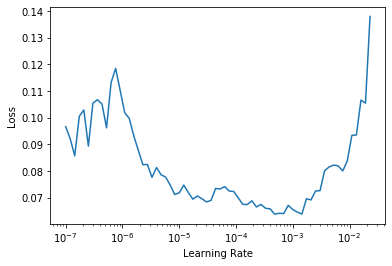

In [4]:
learn.lr_find()

In [5]:
set_seed(42)
learn.fine_tune(10, base_lr=4e-5)

epoch,train_loss,valid_loss,accuracy,subcat_color_acc,subcat_piece_acc,time
0,0.065492,0.005230,0.998258,1.000000,0.998258,00:10


epoch,train_loss,valid_loss,accuracy,subcat_color_acc,subcat_piece_acc,time
0,0.082175,0.005112,0.998258,1.000000,0.998258,00:14
1,0.064411,0.004781,0.998258,1.000000,0.998258,00:14
2,0.054967,0.005601,0.998258,1.000000,0.998258,00:14
3,0.051707,0.005237,0.998258,1.000000,0.998258,00:14
4,0.062478,0.004804,0.998258,1.000000,0.998258,00:14
5,0.059464,0.004022,0.998258,1.000000,0.998258,00:14
6,0.069134,0.005522,0.998258,1.000000,0.998258,00:14
7,0.052326,0.004592,0.998258,1.000000,0.998258,00:14
8,0.048628,0.006483,0.998258,1.000000,0.998258,00:14
9,0.066336,0.004661,0.998258,1.000000,0.998258,00:14


In [7]:
pd.DataFrame(learn.cbs[3].values)

,0,1,2,3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,0.674992,0.793860,0.973684,0.815789
3,0.661693,0.807018,0.978070,0.833333
4,0.669584,0.815789,0.978070,0.842105
5,0.700504,0.802632,0.973684,0.828947
6,0.701615,0.798246,0.978070,0.824561
7,0.652259,0.807018,0.973684,0.833333
8,0.616508,0.811404,0.973684,0.837719
9,0.709149,0.793860,0.969298,0.820175
